In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import 

# **Single Variable Regression**

In [13]:
df = pd.read_csv("../canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


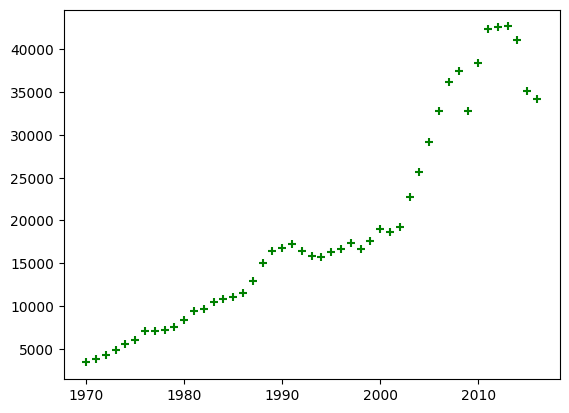

In [14]:
plt.scatter(df["year"], df["per capita income (US$)"], marker="+", color="green")
plt.show()

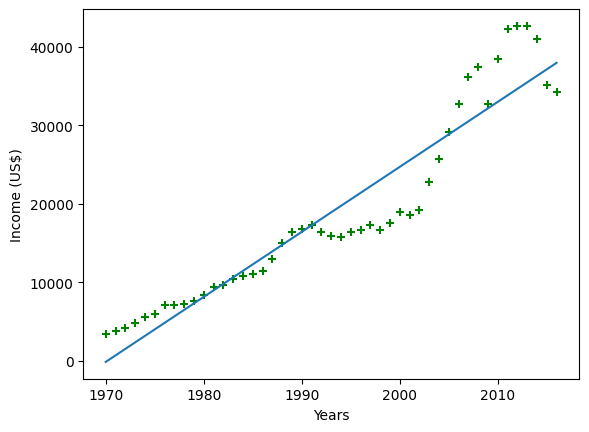

In [15]:
reg = linear_model.LinearRegression()
reg.fit(df[["year"]], df["per capita income (US$)"])
reg.predict(df[["year"]])
plt.scatter(df["year"], df["per capita income (US$)"], marker="+", color="green")
plt.plot(df["year"], reg.predict(df[["year"]]))
plt.xlabel("Years")
plt.ylabel("Income (US$)")
plt.show()

In [16]:
df.loc[len(df.index)] = [2017, reg.predict([[2017]])[0]]

C:\Users\baris\PycharmProjects\Pandas\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
df.drop(47, inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df["year"] = df["year"].apply(lambda x: int(x))

# **Multiple Variable Regression**

In [19]:
hiring_df = pd.read_csv("../hiring.csv")
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
!pip install word2number


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from word2number import w2n

In [22]:
hiring_df["experience"].iloc[2::] = hiring_df["experience"].iloc[2::].apply(lambda x: w2n.word_to_num(x))
hiring_df

C:\Users\baris\AppData\Local\Temp\ipykernel_13008\4174801239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hiring_df["experience"].iloc[2::] = hiring_df["experience"].iloc[2::].apply(lambda x: w2n.word_to_num(x))


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [23]:
hiring_df["experience"] = hiring_df["experience"].fillna(0)

In [24]:
hiring_df["test_score(out of 10)"] = hiring_df["test_score(out of 10)"].fillna(hiring_df["test_score(out of 10)"].median())

In [25]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [26]:
reg = linear_model.LinearRegression()
reg.fit(hiring_df[['experience','test_score(out of 10)','interview_score(out of 10)']],hiring_df['salary($)'])
reg.predict([[2,9,6]])

C:\Users\baris\PycharmProjects\Pandas\venv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])